In [79]:
import pandas as pd
# If you want to do the statistics with your own run of the benchmarks
df = pd.read_csv('../results/stats.csv')
# otherwise do this 
# df = pd.read_csv('../computed/stats.csv')
df = df.fillna(0)
nv = df.groupby('filename').max('nb_vulns')
# Here we compute we group by options and nb of vulsn and we print the mean times taken by the analysis
df.groupby(['options']).mean('time')['time']
tmp = df
tmp['result']= df['result'].map(lambda x: 1 if x  == "TRUE" else 0)
tmp


,filename,property,options,result,loc,time,alarms
0,toy.c,termination,-domain polyhedra -refine -resilience,1,3,0.011,0
1,toy.c,termination,-domain polyhedra -refine,0,3,0.011,1
2,toy.c,termination,-domain polyhedra -ordinals 3 -refine -resili...,1,3,0.010,0
3,toy.c,termination,-domain polyhedra -ordinals 3 -refine,0,3,0.011,1
4,toy.c,termination,-domain boxes -ordinals 3 -refine -resilience,1,3,0.009,0
...,...,...,...,...,...,...,...
2851,trm_svcomp_WhileNestedOffset_false-termination...,termination,-domain polyhedra -joinbwd 8 -ordinals 3 -refine,0,18,0.014,1
2852,trm_svcomp_WhileNestedOffset_false-termination...,termination,-domain boxes -joinbwd 8 -ordinals 3 -refine ...,1,18,0.012,0
2853,trm_svcomp_WhileNestedOffset_false-termination...,termination,-domain boxes -joinbwd 8 -ordinals 3 -refine,0,18,0.011,1
2854,trm_svcomp_WhileNestedOffset_false-termination...,termination,-domain boxes -joinbwd 8 -refine -resilience,1,18,0.012,0


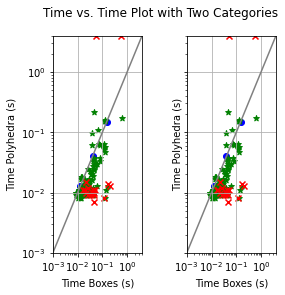

In [282]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
# Get all combinations of length 2 (or any length you want)
def cmp_dataframe(opt1,opt2):
    files = list(dict.fromkeys(df['filename']))
    # je veux comparer les options: j'ai chaque pair d'options, je réccup la valeur pour l'une et pour l'autre et je compare.
    # 
    cmp=pd.DataFrame(columns=['filename','option1','option2','precision','time1','time2'])
    grp=df.groupby(['options','filename']).max("time")
    for fname in files:
        q=f"filename=='{fname}'"
        grpquery= grp.query(q)
        q1 = f"options=='{opt1}'"
        q2 = f"options=='{opt2}'"             
        time1 = grpquery.query(q1)["time"].values[0]
        time2 = grpquery.query(q2)["time"].values[0]
        if (grpquery.query(q1)["result"].values[0] > grpquery.query(q2)["result"].values[0]):    
            tmp =pd.DataFrame([[fname,opt1,opt2,0,time1,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])
        elif (grpquery.query(q1)["result"].values[0] == grpquery.query(q2)["result"].values[0]):    
            tmp =pd.DataFrame([[fname,opt1,opt2,1,time1,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])
        else:
            tmp =pd.DataFrame([[fname,opt1,opt2,2,time2,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])

    return cmp
fig,axs = plt.subplots(1,2,sharey=True,figsize=(4,4))
fig.subplots_adjust(wspace=0.5)
def print_plot(plt,cmp):
    # Plot
    L=len(cmp["filename"])
    #plt.fig(figsize=(10,10))
    # Plot points for category A
    x_min = 0.001
    x_max = 4
    y_min = 0.001
    y_max = 4
    
    category_a =  cmp.query("precision == 2")    
    plt.scatter(category_a['time1'], category_a['time2'],color='blue', label='Boxes more precise than polyedra', marker='o')

    
    category_c =  cmp.query("precision == 1")
    plt.scatter(category_c['time1'], category_c['time2'],color='green', label='Same result', marker='*')

    # Plot points for category B
    
    category_b =  cmp.query("precision == 0")
    plt.scatter(category_b['time1'], category_b['time2'], color='red', label='Polyhedra more precise than Boxes ', marker='x')
    
    
    plt.set_yscale('log')
    plt.set_xscale('log')
    
    plt.set_xlim(x_min, x_max)
    plt.set_ylim(y_min, y_max)
    # Labels and legend
    
    plt.set_xlabel('Time Boxes (s)')
    plt.set_ylabel('Time Polyhedra (s)')
    #plt.legend()
    plt.grid(True)
    yx = np.linspace(0,5,100)  # Generates 100 points between 0 and 10
    # Show the plot
    plt.plot(yx,yx,color='gray')


fig.suptitle('Time vs. Time Plot with Two Categories')

print_plot(axs[0],cmp_dataframe("-domain polyhedra -refine -resilience",  "-domain boxes -refine -resilience"))
print_plot(axs[1],cmp_dataframe("-domain polyhedra -refine -resilience",  "-domain boxes -refine -resilience"))
fig.savefig('cmppolyhedraboxes.svg')

In [ ]:

cmp_dataframe("-domain polyhedra -refine -resilience",  "-domain boxes -refine -resilience").query("precision == 2")

In [248]:
print_plot(cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience",  "-domain boxes -ordinals 3  -refine -resilience"))
# Compare polyhedra and boxes with ord 3
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience",  "-domain boxes -ordinals 3  -refine -resilience").query("precision == 2")

TypeError: print_plot() missing 1 required positional argument: 'name'

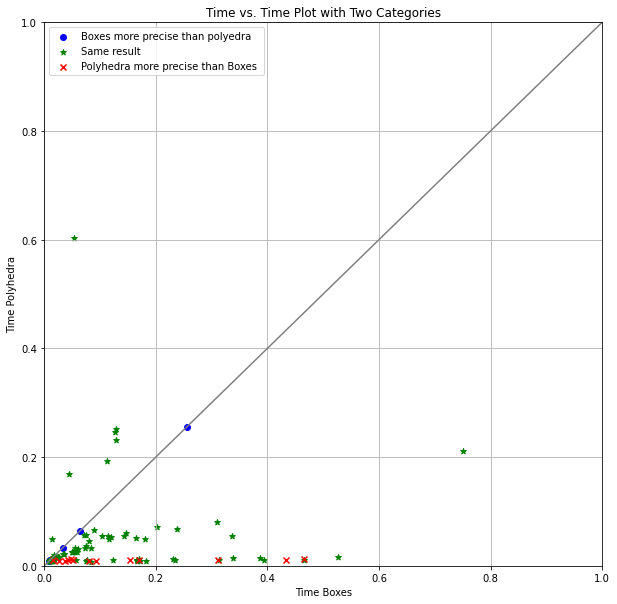

,filename,option1,option2,precision,time1,time2
0,trm_svcomp_GCD2_false-termination-randinput.c,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,2,0.033,0.033
0,trm_svcomp_GCD_false-termination-randinput.c,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,2,0.256,0.256
0,trm_svcomp_Hanoi_3vars_false-termination_rii.c,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,2,0.009,0.009
0,trm_svcomp_Hanoi_3vars_false-termination_rir.c,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,2,0.010,0.010
0,trm_svcomp_Hanoi_3vars_false-termination_rrr.c,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,2,0.064,0.064
0,trm_svcomp_Mysore_false-termination-randinput.c,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,2,0.010,0.010


In [176]:
print_plot(cmp_dataframe("-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience",  "-domain boxes -joinbwd 5 -ordinals 3  -refine -resilience"))
# Compare polyhedra and boxes with ord 3 and widening delay 5
cmp_dataframe("-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience",  "-domain boxes -joinbwd 5 -ordinals 3  -refine -resilience").query("precision == 2")


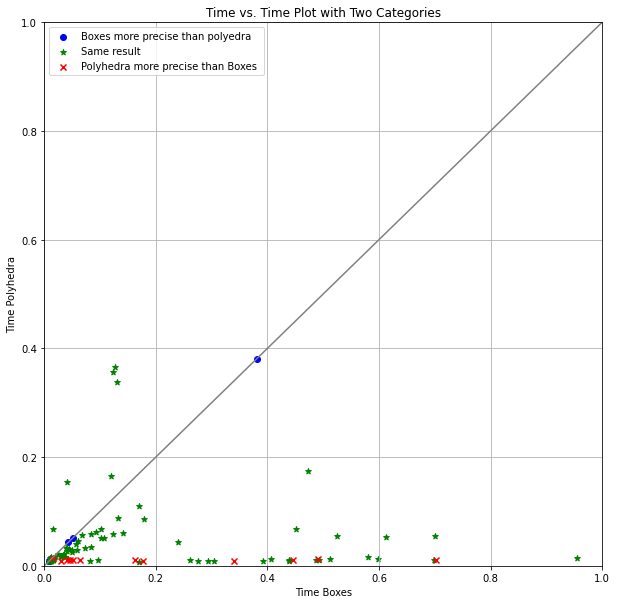

,filename,option1,option2,precision,time1,time2
0,trm_svcomp_GCD2_false-termination-randinput.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -joinbwd 8 -ordinals 3 -refine ...,2,0.043,0.043
0,trm_svcomp_GCD_false-termination-randinput.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -joinbwd 8 -ordinals 3 -refine ...,2,0.381,0.381
0,trm_svcomp_Hanoi_3vars_false-termination_rii.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -joinbwd 8 -ordinals 3 -refine ...,2,0.012,0.012
0,trm_svcomp_Hanoi_3vars_false-termination_rir.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -joinbwd 8 -ordinals 3 -refine ...,2,0.009,0.009
0,trm_svcomp_Hanoi_3vars_false-termination_rrr.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -joinbwd 8 -ordinals 3 -refine ...,2,0.052,0.052
0,trm_svcomp_Mysore_false-termination-randinput.c,-domain polyhedra -joinbwd 8 -ordinals 3 -ref...,-domain boxes -joinbwd 8 -ordinals 3 -refine ...,2,0.009,0.009


In [177]:
print_plot(cmp_dataframe("-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience",  "-domain boxes -joinbwd 8 -ordinals 3  -refine -resilience"))
# Compare polyhedra and boxes with ord 3 and widening delay 8
cmp_dataframe("-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience",  "-domain boxes -joinbwd 8 -ordinals 3  -refine -resilience").query("precision == 2")

In [183]:
# Compare polyhedra with ord 3 and without
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience","-domain polyhedra -refine -resilience").query("precision == 1")

,filename,option1,option2,precision,time1,time2
0,toy.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.010,0.011
0,trm_svcomp_2Nested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.121,0.023
0,trm_svcomp_2Nested_false-termination-inputrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.142,0.022
0,trm_svcomp_2Nested_false-termination-randinput.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.125,0.022
0,trm_svcomp_2Nested_false-termination-randrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.147,0.023
...,...,...,...,...,...,...
0,trm_svcomp_UpAndDown_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.054,0.043
0,trm_svcomp_UpAndDownIneq_false-termination-inp...,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.046,0.045
0,trm_svcomp_UpAndDownIneq_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.055,0.060
0,trm_svcomp_WhileNested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -refine -resilience,1,0.020,0.019


In [179]:
# Compare polyhedra with ord 3 and with ord 3 + delay 5
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience","-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience").query("precision == 1")



,filename,option1,option2,precision,time1,time2
0,toy.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.010,0.012
0,trm_svcomp_2Nested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.121,0.166
0,trm_svcomp_2Nested_false-termination-inputrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.142,0.169
0,trm_svcomp_2Nested_false-termination-randinput.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.125,0.170
0,trm_svcomp_2Nested_false-termination-randrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.147,0.310
...,...,...,...,...,...,...
0,trm_svcomp_UpAndDown_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.054,0.055
0,trm_svcomp_UpAndDownIneq_false-termination-inp...,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.046,0.049
0,trm_svcomp_UpAndDownIneq_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.055,0.050
0,trm_svcomp_WhileNested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 5 -ordinals 3 -ref...,1,0.020,0.017


In [180]:
# Compare BOXES with ord 3 and  boxes with ord 3 + delay 5
cmp_dataframe("-domain boxes -ordinals 3  -refine -resilience","-domain boxes -joinbwd 5 -ordinals 3  -refine -resilience" ).query("precision == 1")

,filename,option1,option2,precision,time1,time2
0,toy.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.009,0.010
0,trm_svcomp_2Nested_false-termination-input.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.011,0.010
0,trm_svcomp_2Nested_false-termination-inputrand.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.014,0.011
0,trm_svcomp_2Nested_false-termination-randinput.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.011,0.012
0,trm_svcomp_2Nested_false-termination-randrand.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.061,0.081
...,...,...,...,...,...,...
0,trm_svcomp_UpAndDown_false-termination-rand.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.034,0.032
0,trm_svcomp_UpAndDownIneq_false-termination-inp...,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.026,0.026
0,trm_svcomp_UpAndDownIneq_false-termination-rand.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.022,0.025
0,trm_svcomp_WhileNested_false-termination-input.c,-domain boxes -ordinals 3 -refine -resilience,-domain boxes -joinbwd 5 -ordinals 3 -refine ...,1,0.012,0.015


In [181]:
# Compare polyhedra with ord 3 and with ord 3 + delay 5
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience","-domain polyhedra -joinbwd 8 -refine -resilience").query("precision == 1")


,filename,option1,option2,precision,time1,time2
0,toy.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.010,0.011
0,trm_svcomp_2Nested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.121,0.227
0,trm_svcomp_2Nested_false-termination-inputrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.142,0.230
0,trm_svcomp_2Nested_false-termination-randinput.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.125,0.227
0,trm_svcomp_2Nested_false-termination-randrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.147,0.354
...,...,...,...,...,...,...
0,trm_svcomp_UpAndDown_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.054,0.049
0,trm_svcomp_UpAndDownIneq_false-termination-inp...,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.046,0.047
0,trm_svcomp_UpAndDownIneq_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.055,0.080
0,trm_svcomp_WhileNested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.020,0.013


In [182]:
# Compare polyhedra with ord 3 and with ord 3 + delay 8
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience","-domain polyhedra -joinbwd 8 -refine -resilience").query("precision == 1")


,filename,option1,option2,precision,time1,time2
0,toy.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.010,0.011
0,trm_svcomp_2Nested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.121,0.227
0,trm_svcomp_2Nested_false-termination-inputrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.142,0.230
0,trm_svcomp_2Nested_false-termination-randinput.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.125,0.227
0,trm_svcomp_2Nested_false-termination-randrand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.147,0.354
...,...,...,...,...,...,...
0,trm_svcomp_UpAndDown_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.054,0.049
0,trm_svcomp_UpAndDownIneq_false-termination-inp...,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.046,0.047
0,trm_svcomp_UpAndDownIneq_false-termination-rand.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.055,0.080
0,trm_svcomp_WhileNested_false-termination-input.c,-domain polyhedra -ordinals 3 -refine -resili...,-domain polyhedra -joinbwd 8 -refine -resilience,1,0.020,0.013
